In [1]:
import pandas as pd 
import numpy as np
import torch 
import torch.nn
import os
from datetime import datetime

In [2]:
data = os.getcwd() + '/data'
path_load = data + '/LoadData.csv'
path_temp = data + '/weather_data_filtered.csv'

In [3]:
load_data = pd.read_csv(path_load,index_col=0,header=0)
temp_data = pd.read_csv(path_temp,index_col=0,header=0)

In [4]:
load_data.head()

,AT_load_actual_entsoe_power_statistics,week,mean,std
utc_timestamp,,,,
2011-01-01T00:00:00Z,6938.0,5,8229.03836,1257.86589
2011-01-01T01:00:00Z,6575.0,5,8229.03836,1257.86589
2011-01-01T02:00:00Z,6234.0,5,8229.03836,1257.86589
2011-01-01T03:00:00Z,6126.0,5,8229.03836,1257.86589
2011-01-01T04:00:00Z,6141.0,5,8229.03836,1257.86589


In [5]:
temp_data.head()

,AT_windspeed_10m,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal
utc_timestamp,,,,
2011-01-01T00:00:00Z,2.37,-5.611,0.0,0.0
2011-01-01T01:00:00Z,2.32,-5.657,0.0,0.0
2011-01-01T02:00:00Z,2.32,-5.674,0.0,0.0
2011-01-01T03:00:00Z,2.34,-5.879,0.0,0.0
2011-01-01T04:00:00Z,2.41,-6.202,0.0,0.0


In [6]:
# 处理 温度等数据
# 将新列 [month, day, hour, weekday] 加进去
# 先新建空列表，再将值赋进去，最后再赋给pandas
hour = []
day = []
month = []
for i in range(temp_data.shape[0]):
    hour.append(int(temp_data.index[i][11:13])) # hour
    day.append(int(temp_data.index[i][8:10]))   # day
    month.append(int(temp_data.index[i][5:7]))  # month

temp_data = temp_data.assign(month=pd.Series(month).values, hour=pd.Series(hour).values, day=pd.Series(day).values)
temp_data['weekday'] = load_data['week']

In [7]:
temp_data.head()

,AT_windspeed_10m,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,month,hour,day,weekday
utc_timestamp,,,,,,,,
2011-01-01T00:00:00Z,2.37,-5.611,0.0,0.0,1,0,1,5
2011-01-01T01:00:00Z,2.32,-5.657,0.0,0.0,1,1,1,5
2011-01-01T02:00:00Z,2.32,-5.674,0.0,0.0,1,2,1,5
2011-01-01T03:00:00Z,2.34,-5.879,0.0,0.0,1,3,1,5
2011-01-01T04:00:00Z,2.41,-6.202,0.0,0.0,1,4,1,5


In [8]:
# 标准化温度、风速、日期...
temp_data = (temp_data - temp_data.mean()) / temp_data.std()

In [9]:
temp_data.head()

,AT_windspeed_10m,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,month,hour,day,weekday
utc_timestamp,,,,,,,,
2011-01-01T00:00:00Z,-0.414835,-1.595277,-0.538448,-0.736084,-1.601239,-1.661309,-1.673899,0.499853
2011-01-01T01:00:00Z,-0.455814,-1.600487,-0.538448,-0.736084,-1.601239,-1.516847,-1.673899,0.499853
2011-01-01T02:00:00Z,-0.455814,-1.602412,-0.538448,-0.736084,-1.601239,-1.372386,-1.673899,0.499853
2011-01-01T03:00:00Z,-0.439422,-1.625629,-0.538448,-0.736084,-1.601239,-1.227924,-1.673899,0.499853
2011-01-01T04:00:00Z,-0.382052,-1.662210,-0.538448,-0.736084,-1.601239,-1.083462,-1.673899,0.499853


In [10]:
# 计算负载
load_data.head()

,AT_load_actual_entsoe_power_statistics,week,mean,std
utc_timestamp,,,,
2011-01-01T00:00:00Z,6938.0,5,8229.03836,1257.86589
2011-01-01T01:00:00Z,6575.0,5,8229.03836,1257.86589
2011-01-01T02:00:00Z,6234.0,5,8229.03836,1257.86589
2011-01-01T03:00:00Z,6126.0,5,8229.03836,1257.86589
2011-01-01T04:00:00Z,6141.0,5,8229.03836,1257.86589


In [35]:
# 计算移动平均值和移动方差
load_data['rolling_mean'] = load_data['AT_load_actual_entsoe_power_statistics'].rolling(7*24).mean()
load_data['rolling_std'] = load_data['AT_load_actual_entsoe_power_statistics'].rolling(7*24).std()
# 填充缺失值
print('填充前')
rolling_mean_null = load_data['rolling_mean'].isnull().sum()
rolling_std_null = load_data['rolling_std'].isnull().sum()
print(f'rolling_mean列有缺失值:{rolling_mean_null}个')
print(f'rolling_std列有缺失值:{rolling_std_null}个')
load_data['rolling_mean'].fillna(load_data['rolling_mean'][167],inplace = True)
load_data['rolling_std'].fillna(load_data['rolling_std'][167],inplace = True)
print('填充后')
rolling_mean_null = load_data['rolling_mean'].isnull().sum()
rolling_std_null = load_data['rolling_std'].isnull().sum()
print(f'rolling_mean列有缺失值:{rolling_mean_null}个')
print(f'rolling_std列有缺失值:{rolling_std_null}个')

填充前
rolling_mean列有缺失值:167个
rolling_std列有缺失值:167个
填充后
rolling_mean列有缺失值:0个
rolling_std列有缺失值:0个


In [37]:
load_data['load'] = (load_data['AT_load_actual_entsoe_power_statistics'] - load_data['mean']) / load_data['std']
load_data['rolling_load'] = (load_data['AT_load_actual_entsoe_power_statistics'] - load_data['rolling_mean']) / load_data['rolling_std']

In [38]:
load_data.head(180)

,AT_load_actual_entsoe_power_statistics,week,mean,std,rolling_mean,rolling_std,load,rolling_load
utc_timestamp,,,,,,,,
2011-01-01T00:00:00Z,6938.0,5,8229.038360,1257.865890,8228.440476,1261.517391,-1.026372,-1.022927
2011-01-01T01:00:00Z,6575.0,5,8229.038360,1257.865890,8228.440476,1261.517391,-1.314956,-1.310676
2011-01-01T02:00:00Z,6234.0,5,8229.038360,1257.865890,8228.440476,1261.517391,-1.586050,-1.580985
2011-01-01T03:00:00Z,6126.0,5,8229.038360,1257.865890,8228.440476,1261.517391,-1.671910,-1.666597
2011-01-01T04:00:00Z,6141.0,5,8229.038360,1257.865890,8228.440476,1261.517391,-1.659985,-1.654706
...,...,...,...,...,...,...,...,...
2011-01-08T07:00:00Z,8202.0,5,8625.311933,1465.000646,8251.238095,1238.330541,-0.288950,-0.039762
2011-01-08T08:00:00Z,8587.0,5,8625.311933,1465.000646,8259.494048,1235.901150,-0.026151,0.264994
2011-01-08T09:00:00Z,8827.0,5,8625.311933,1465.000646,8266.767857,1235.622072,0.137671,0.453401


In [39]:
# 合并 温度 和负载数据到一个表格中，并且导出
data = temp_data.copy()
data['load'] = load_data['load']
data['rolling_load'] = load_data['rolling_load']

In [40]:
data.head()

,AT_windspeed_10m,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,month,hour,day,weekday,load,rolling_load
utc_timestamp,,,,,,,,,,
2011-01-01T00:00:00Z,-0.414835,-1.595277,-0.538448,-0.736084,-1.601239,-1.661309,-1.673899,0.499853,-1.026372,-1.022927
2011-01-01T01:00:00Z,-0.455814,-1.600487,-0.538448,-0.736084,-1.601239,-1.516847,-1.673899,0.499853,-1.314956,-1.310676
2011-01-01T02:00:00Z,-0.455814,-1.602412,-0.538448,-0.736084,-1.601239,-1.372386,-1.673899,0.499853,-1.586050,-1.580985
2011-01-01T03:00:00Z,-0.439422,-1.625629,-0.538448,-0.736084,-1.601239,-1.227924,-1.673899,0.499853,-1.671910,-1.666597
2011-01-01T04:00:00Z,-0.382052,-1.662210,-0.538448,-0.736084,-1.601239,-1.083462,-1.673899,0.499853,-1.659985,-1.654706


In [41]:
data.to_csv('./data/data.csv')

In [42]:
import matplotlib.pyplot as plt

In [43]:
load_data.tail()

,AT_load_actual_entsoe_power_statistics,week,mean,std,rolling_mean,rolling_std,load,rolling_load
utc_timestamp,,,,,,,,
2016-12-31T19:00:00Z,7736.0,5,7905.984788,1208.036576,7853.208333,1144.360993,-0.140712,-0.102423
2016-12-31T20:00:00Z,7386.0,5,7905.984788,1208.036576,7855.184524,1143.258714,-0.430438,-0.410392
2016-12-31T21:00:00Z,7661.0,5,7905.984788,1208.036576,7858.041667,1142.163020,-0.202796,-0.172516
2016-12-31T22:00:00Z,7343.0,5,7905.984788,1208.036576,7861.607143,1139.596567,-0.466033,-0.455080
2016-12-31T23:00:00Z,7096.0,5,7905.984788,1208.036576,7866.125000,1135.011447,-0.670497,-0.678517


<AxesSubplot:xlabel='utc_timestamp'>

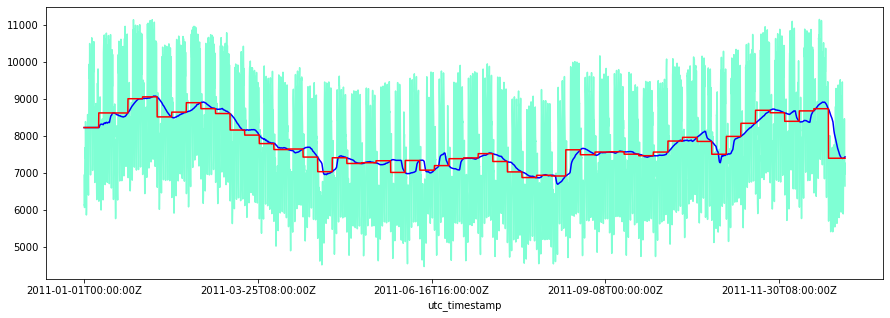

In [44]:
load_data['AT_load_actual_entsoe_power_statistics'][:365*24].plot(figsize=(30,5),color='aquamarine')
load_data['rolling_mean'][:365*24].plot(figsize=(30,5),color='b')
load_data['mean'][:365*24].plot(figsize=(15,5),color='r')